In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Python data manipulation and visualization

Let's begin by reviewing some of the terms we've covered in the past sessions that will come up again today.

| Term | Definition |
| --- | --- |
| Object | The thing itself (an instance of a class) |
| Variable | The name we give the object (a pointer to the object) |
| Class | The blueprint for the object (defines the attributes and methods of object) |
| Method | A function that belongs to an object |
| Attribute | A property of an object |
| Function | A piece of code that takes an input and gives an output/does something |
| Argument| The objects that are passed to the function for it to operate on |
| Library | Collections of python functions/capabilities that can be installed and loaded on top of base python|

## Data structures in general

On our first day, we covered a few basic object types, such as strings, numbers, and booleans. Today when I talk about data, I mean the observations we have recorded as represented by one of these object types. This excludes for now things like images, audio, physical, or other data. Those can very much still be analyzed computationally (and by using python), but it is beyond the scope of this workshop. 

Today we'll mostly be focusing on various data structures, which are collections of individual observations. We've already seen lists, dictionaries, numpy arrays, and pandas dataframes, but why are there so many and how do they differ in the way we work with them? Why don't we just use Microsoft Excel for everything?

Although you can look at your data in Excel, it's not a good platform for analyzing it. It is sluggish for large datasets, is not reproducible unlike code, it's difficult to automate, and the visualization capabilities are limited. You can also do more advanced analyses faster using python than using Excel. 

Python has various data structures because we interact with data in different ways and need different representations of them with their own set of capabilities. 


### Lists

Lists are the most basic of data structures. They are created with `[]` and can contain any type of data. Each entry is separated by a comma. Lists are ordered and can be indexed, sliced, and concatenated just like strings. When lists are all numerical, they can also support mathematical operations like `max()` and `min()`. Lists can also be nested using another `[]` within the list. 

Lists are our first introduction to a **mutable** data structure, meaning you can change a list without having to create a new one. Indeed, list methods may modify your data **in place** and/or **return** a new object. If the method modifies the object in place, its return value will be `None`. Modifying in place means you don't have to assign the result of the method to a new variable, while returning a new object means you do have to assign it. For example, `list.append(x)` updates the list in place, while `list.pop()` both returns the last element and removes it from the list in place. 

Below are some useful operations and methods for lists. For a full list of methods, you can use `help()` on the list or consult the [docs](https://docs.python.org/3/library/stdtypes.html#list) page. 

**Operations and methods for lists**

| Operation/Method | Description |
| --- | --- |
| `+` | Concatenation |
| `*` | Repetition |
| `[]`, `[:]` | Indexing, slicing |
| `.append(x)` | Add `x` to the end of the list |
| `.extend([x, y, z])` | Add `[x, y, z]` to the end of the list |
| `.insert(i, x)` | Add `x` at index `i` of the list |
| `.pop(i)` | Remove and return the element at index `i`, defaults to last element if none given |

**Use cases for lists**

Lists are a data structure that is always there in the background, being useful. We see them when creating simple ordered collections to iterate through, when we need to store a sequence of data to reference later, or when we need to collected a bunch of objects together. Think of lists as a small temporary transport for data. Lists are not good for large datasets (because it will be slow) or when you need to do a lot of mathematical operations (because it lacks functionality). 

### Dictionaries

Dictionaries store key:value pairs. Keys are typically strings or numerical identifiers, while the values can be just about anything, including other dictionaries, lists, or individual values. You can create a dictionary with `{}` or with the `dict()` function. The two ways to create a dictionary are shown below:

```python
my_dict = {'a': 1, 'b': 2, 'c': 3}
my_dict = dict(("a", 1), ("b", 2), ("c", 3))
```

Dictionaries are unordered, so you can't index/slice them. But you can retrieve items by their key, e.g. `my_dict["a"]` or `my_dict.get("a")`. Like lists, dictionaries are mutable, so you can add, remove, or update the key:value pairs in place. Other methods return "View objects" that allow you to see the items in the dictionary, but won't allow you to modify the dictionary. Here are some useful methods for dictionaries:

**Operations and methods for dictionaries**

| Operation/Method | Description |
| --- | --- |
| `[]` | Retrieve value by key |
| `.keys()` | Returns a view object of the keys |
| `.values()` | Returns a view object of the values |
| `.items()` | Returns a view object of the key:value pairs |
| `.update(dict)` | Updates the dictionary with the key:value pairs from another dictionary |

**Use cases for dictionaries**

Dictionaries are a data structure that is more specialized for information that can be organized in a key:value pair way. You may see dictionaries being used to store associations between a name/ID and some characteristics, or to store a set of parameters for a function, or to organize a hierarchical grouping of information. Dictionaries are optimized for fast access to the values by key and for flexible organization of the data. Although you can edit the values of a dictionary, they aren't good for mathematical operations or for ordered data. 

## Numpy

### Numpy arrays

Numpy arrays are a data structure that only contain one type of data, typically numerical, and are N-dimensional (any number of dimensions). You can create numpy arrays using the `np.array()` function or by converting other data structures to an array using `np.asarray()` or other helper functions. There are also many functions that can create an array with pre-filled numbers, such as `np.zeros()` and `np.arange()`. An array is defined by its `shape`, which describes the number of elements in each dimension, also known as axes. The first axis is the number of rows, the second is the number of columns, and so on. 

Today we will be spending a lot of time with numpy arrays as they are one of the main data structures for working with numerical data. We will learn how to navigate them, read and write from them, and also how to perform mathematical operations on them. We will also use numpy to create some visualizations. 

**Use cases for numpy arrays**

The use cases for numpy arrays are very broad. They are used in scientific computing, machine learning, data analysis, and more. They are optimized for fast mathematical operations and are very efficient in terms of memory usage. They are also very flexible in terms of the number of dimensions they can have, so you can store a lot of data in a single numpy array. They are not good for storing mixed data types or for storing data that is not numerical. 


#### Broadcasting

You can perform mathematical operations on arrays and they'll propagate to each element. This is called **broadcasting**. In order for the element-wise operation to work, the two objects you're operating with either have to have the same shape or one of them has to be a scalar. Numpy also has functions that allow you to operate on the entire array, such as `np.sum()`, `np.mean()`, etc. In the last session, we wrote a function to calculate the mean squared error of two 1D arrays using the formula $\frac{1}{n}\sum_{i=1}^{n}(predicted_i - expected_i)^2$. 

In [2]:
predicted = np.array([1, 2, 3, 4, 5])
expected = np.array([2, 4, 1, 5, 5])
mse = (1/len(predicted)) * np.sum(np.square(predicted - expected))
print(mse)

2.0


Breaking down the code, you can see what is produced at each step

In [3]:
print(predicted - expected)
print(np.square(predicted - expected))
print(np.sum(np.square(predicted - expected)))
print(1/len(predicted))

[-1 -2  2 -1  0]
[1 4 4 1 0]
10
0.2


#### Slicing and indexing numpy arrays

Slicing arrays is a powerful tool for extracting subsets of data. The syntax for slicing is `array[start:stop:step]`. If you don't specify a start, it defaults to 0, if you don't specify a stop, it defaults to the end of the array, and if you don't specify a step, it defaults to 1. When you specify a start and stop, the range is inclusive of the start and exclusive of the stop. Usually, you don't need to specify the step, so you can omit the second colon. 

You can also use negative indices to count from the end of the array. When you use negative indices, inclusive of the start and exclusive of the stop still applies.

Multi-dimensional numpy arrays are sliced and indexed with the same syntax, but you need to separate the dimensions with a comma. For example, `array[i, j]` will return the element at row `i` and column `j`. In two dimensions, the first axis is the rows and the second axis is the columns. So now the syntax is `array[row_start:row_stop:row_step, col_start:col_stop:col_step]`.

Here are some examples of slicing one-dimensional and two-dimensional arrays. See if you can predict the output before running the code.

In [4]:
# Examples of slicing one-dimensional arrays
arr1 = np.array([1, 2, 3, 4, 5])
print(arr1[0:2])
print(arr1[1:3])
print(arr1[:])
print(arr1[2:])
print(arr1[-1:])
print(arr1[:-1])
print(arr1[-3:-1])
print(arr1[::2])
print(arr1[::-1])

[1 2]
[2 3]
[1 2 3 4 5]
[3 4 5]
[5]
[1 2 3 4]
[3 4]
[1 3 5]
[5 4 3 2 1]


Let's practice slicing the following array of 25 elements reshaped into a 5x5 array:

In [5]:
arr = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])
print(arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


>**Exercise**: Perform the following operations on the `arr` array:
>
> 1. Extract the first row
> 2. Extract the last column
> 3. Extract the first three rows
> 4. Extract the central 3x3 square
> 5. Extract the last column using positive indexing, and then do it again using negative indexing
> 6. Extract every other column (and all rows)
> 7. Extract every other element of the first row. You should get [1, 3, 5]
> 8. Extract the last row and reverse it. You should get [25, 24, 23, 22, 21]

In [6]:
# 1. Extract the first row of the array
# Your code here
print(arr[0,:])

[1 2 3 4 5]


In [7]:
# 2. Extract the last column
# Your code here
print(arr[:,-1])

[ 5 10 15 20 25]


In [8]:
# 3. Extract the first three rows
# Your code here
print(arr[:3,:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [9]:
# 4. Extract the central 3x3 square
# Your code here
print(arr[1:4,1:4])

[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


In [10]:
# 5. Extract the last column using positive indexing, then do it again using negative indexing
# Your code here
print(arr[:,4])
print(arr[:,-1])

[ 5 10 15 20 25]
[ 5 10 15 20 25]


In [11]:
# 6. Extract every other column (and all rows)
# Your code here
print(arr[:,::2])

[[ 1  3  5]
 [ 6  8 10]
 [11 13 15]
 [16 18 20]
 [21 23 25]]


In [12]:
# 7. Extract every other element of the first row. You should get [1, 3, 5]
# Your code here
print(arr[0,::2])

[1 3 5]


In [13]:
# 8. Extract the last row and reverse it. You should get [25, 24, 23, 22, 21]
# Your code here
print(arr[-1,::-1])

[25 24 23 22 21]


>**Bonus Exercises**: Here are some more challenging slicing exercises:
>
> B1. Extract every other column and every other row, starting with the number 1. You should get:
> ```
> [[ 1  3  5]
>  [11 13 15]
>  [21 23 25]]
> ```
> B2. Extract a checkerboard pattern starting from the number 2. You should get:
> ```
> [[ 2  4]
>  [12 14]
>  [22 24]]
> ```

In [14]:
# B1. Extract every other column and every other row, starting with the number 1.
# Your code here
print(arr[::2,::2])

[[ 1  3  5]
 [11 13 15]
 [21 23 25]]


In [15]:
# B2. Extract a checkerboard pattern starting from the number 2.
# Your code here
print(arr[1::2,1::2])

[[ 7  9]
 [17 19]]


It's important to note that slicing arrays creates a **view** of the original array, not a copy. This is known as "passing by reference". That means if you use a slice of an array and modify it, the original array will also be modified. 

In [16]:
# This is the original array
print(arr)
# This is my slice of the array
slice = arr[1:4,1:4]
print(slice)
# I'm going to change the slice
slice[:,:] = 999
print(slice)
# This is the original array
print(arr)


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]
[[999 999 999]
 [999 999 999]
 [999 999 999]]
[[  1   2   3   4   5]
 [  6 999 999 999  10]
 [ 11 999 999 999  15]
 [ 16 999 999 999  20]
 [ 21  22  23  24  25]]


In [17]:
# Reseting the array
arr = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

When you do a calculation on a slice of an array, the result will be a new array.

In [18]:
# This is the original array
print(arr)
# This is my slice of the array
slice = arr[1:4,1:4]
print(slice)
# add 100 to each element of the slice
slice = slice + 100
print(slice)
# This is the original array
print(arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]
[[107 108 109]
 [112 113 114]
 [117 118 119]]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


#### Using boolean masks to filter arrays

You can use boolean expresssions to filter arrays. Here's an example:

In [19]:
# Getting the even numbers from the array
arr[arr % 2 == 0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

Under the hood, numpy creates a boolean mask that is the same shape as the array. The mask is `True` where the condition is met and `False` where it is not. You can then use the mask to filter the array.

In [20]:
print(arr % 2 == 0)
print(arr)

[[False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


When using boolean masks in this way, it's important to note that the original shape of the array is not preserved. So this is useful if you want to filter out elements and do something with that collection of elements, but not if you want to replace certain elements with others. 

If you want to replace elements in an array based on a condition, you can use the `np.where()` function. This function takes three arguments: the condition, the value to use if the condition is `True`, and the value to use if the condition is `False`.

In the code block below, we will replace all of the odd numbers in the array with the number 0.

In [21]:
np.where(arr % 2 == 0, arr, 0)

array([[ 0,  2,  0,  4,  0],
       [ 6,  0,  8,  0, 10],
       [ 0, 12,  0, 14,  0],
       [16,  0, 18,  0, 20],
       [ 0, 22,  0, 24,  0]])

>**Exercise**: Perform the following operations on the `arr` array using boolean masks:
>
> 1. Extract all values less than the mean
> 2. Trim the array by removing the maximum and mininum value
> 3. Replace the maximum and minimum values with the mean of the entire array

In [22]:
# Extract all values less than the mean
# Your code here
arr[arr < np.mean(arr)]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [23]:
# Trim the array by removing the maximum and mininum value. Use np.min() and np.max() to find the min and max values
# Hint: it might be easiest to explicitly create the boolean mask for this
# The operator & is the element-wise AND operator, it returns True if both elements in an array are True
# Your code here

not_max = arr != np.max(arr)
not_min = arr != np.min(arr)
mask = not_max & not_min

# could also do: mask = (arr != np.max(arr)) & (arr != np.min(arr))
# could also do: mask = np.logical_and(arr != np.max(arr), arr != np.min(arr))
# could also do: mask = np.all([arr != np.max(arr), arr != np.min(arr)], axis=0)

arr[mask]


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

In [24]:
# Replace the maximum and minimum values with the mean of the entire array
# Hint: you can use the mask you created above and np.where()

np.where(mask, arr, np.mean(arr))

array([[13.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 13.]])

### Numpy math functions and additional capabilities

The numpy library isn't just about arrays. It also has a lot of mathematical functions that can be applied to arrays. Some of these functions may seem like duplicates of base python functions, but they are optimized for operating on multi-dimensional arrays whereas the base python functions are not. Other functions are unique to numpy and offer more advanced mathematical capabilities.

You can find a list of all mathematical functions in the numpy library [here](https://numpy.org/doc/stable/reference/routines.math.html).

In [25]:
# Getting the mean of the array along the columns
np.mean(arr, axis=0)

array([11., 12., 13., 14., 15.])

In [26]:
# getting the mean along the rows
np.mean(arr, axis=1)

array([ 3.,  8., 13., 18., 23.])

In [27]:
# getting the standard deviation along the columns
np.std(arr, axis=0)

array([7.07106781, 7.07106781, 7.07106781, 7.07106781, 7.07106781])

In [28]:
# getting histogram of the array
np.histogram(arr, bins=5, range=(1, 25))
# if you don't want to hardcode the range, you can use the min and max functions
np.histogram(arr, bins=5, range=(np.min(arr), np.max(arr)))

(array([5, 5, 5, 5, 5]), array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. ]))

## Reading and writing data

We are going to take a short break from numpy to learn how to read and write data from files. Then, we will bring it back to numpy to learn how to read and write numpy arrays. Reading and writing files is a very important step in data analysis. For example, some raw files you have may be structured in a way that isn't machine-readable. Parsing or fixing those files is often easier using python or another coding language than re-doing it by hand. You may find yourself generating data or calculations that you want to save to your local machine. Using code to read and write files enhances reproducibility and automation.

### Reading data by line

A common way to read data is by line. This is useful when you have a file that is too large to fit into memory all at once. You can read the file line by line and process each line as you go. This is also useful when you need to parse a file that has a specific structure so that it can be read into a data structure like a numpy array or pandas dataframe. In this section, when we talk about files, we mean text files that contain data that exist on your local machine. This is different from the data structures we've been working with so far, which are in memory (in your python instance).

The syntax for opening a file is `open(filename, mode)`, where mode can be `r` for reading, `w` for writing, `a` for appending. Reading mode means that you can only read the file but not change it (on the disk). Writing mode means you are creating a new file or overwriting an existing file. Appending mode means you are adding to an existing file.

When you open a file, you can read it line by line using a for loop. Normally, when you open a file, you should also close it with the `close()` method. However, a more "pythonic" way to do this is to use a `with` statement, which will automatically close the file once you've done what you need. Here's an example of how that might look with a for loop to print each line of a file:

```python
with open('filename.txt', 'r') as file:
    for line in file:
        print(line)
```

The above code will print each line of the file to the console. The variable `file` is how we refer to the file object that we've opened. We can name it anything we want, but `file` was just an example. The `line` variable is how we refer to each line of the file as we iterate through it. Again, it's an arbitrary name. This for loop is similar to how we iterate through a list. The only difference is that we're iterating through something that is being read from our local computer rather than an object in memory.

In the example, we are only printing the lines of the file, but just as with any for loop, you can do anything you want with each line, such as apply a function to it, split it up and store it in a data structure, or write different parts of it to a new file. So think of that `print(line)` line as a placeholder for whatever you want to do with the line.

#### Vocab

|Term|Definition|
|---|---|
|File|A collection of data stored on a disk|
|Line|A string of characters that ends with a newline character|
|Newline character|A special character that indicates the end of a line, usually `\n`|
|Delimiter|A character that separates data fields in a line, usually a comma, tab, or space|
|Parsing|The process of extracting data from a file|
|Whitespace|Any character that represents a space, tab, or newline|
|Leading/trailing whitespace|Whitespace at the beginning or end of a string|


Let's work through a more concrete example of how we might read and then parse through a file. Let's suppose we have a list of taxon ids and bird names that we want to read into a dictionary. The file looks like this:

```
Anas rubripes,American Black Duck,6924
Fulica americana,American Coot,473
Spinus tristis,American Goldfinch,145310
Falco sparverius,American Kestrel,4665
```

In the code below we first read the file line by line, then strip the whitespace and split the line by a comma. Then, we will create a dictionary where the key is the taxon id and the value is the common name of the bird.

In [ ]:
# This line downloads the file locally to the same folder as your notebook
!wget https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/bird_names.csv

In [30]:
filename = 'bird_names.csv'

bird_names = dict()

with open(filename, 'r') as file:
    for line in file:
        line = line.strip().split(',')
        bird_names[line[2]] = line[1]

print(bird_names)

{'6924': 'American Black Duck', '473': 'American Coot', '145310': 'American Goldfinch', '4665': 'American Kestrel', '12727': 'American Robin', '474210': 'American Tree Sparrow', '3936': 'American Woodcock', '16010': 'Ash-throated Flycatcher', '5305': 'Bald Eagle', '9346': 'Baltimore Oriole', '19893': 'Barred Owl', '2548': 'Belted Kingfisher', '144815': 'Black-capped Chickadee', '4981': 'Black-crowned Night Heron', '199916': 'Black-throated Blue Warbler', '8229': 'Blue Jay', '7458': 'Brown Creeper', '10373': 'Brown-headed Cowbird', '6993': 'Bufflehead', '7089': 'Canada Goose', '7513': 'Carolina Wren', '7428': 'Cedar Waxwing', '6571': 'Chimney Swift', '9135': 'Chipping Sparrow', '9602': 'Common Grackle', '4626': 'Common Loon', '7004': 'Common Merganser', '8010': 'Common Raven', '9721': 'Common Yellowthroat', '5112': "Cooper's Hawk", '10094': 'Dark-eyed Junco', '10676': 'Dickcissel', '120479': 'Domestic Greylag Goose', '236935': 'Domestic Mallard', '1454382': 'Double-crested Cormorant', '

>**Exercise**: Rerun the code above and remove the `strip()` method. What happens?

>**Exercise**: Copy the code above and modify it so that the dictionary keys are the taxon ids and the values are another dictionary, with keys 'scientific_name' and 'common_name' and values the appropriate entries for that bird species.
>
> For example, a sample dictionary entry should look like this:
> ```
> {6924: {'scientific_name': 'Anas rubripes', 'common_name': 'American Black Duck'}}
> ```

In [31]:
# Your code here
bird_names = dict()

with open(filename, 'r') as file:
    for line in file:
        line = line.strip().split(',')
        bird_names[line[2]] = {'scientific_name': line[0], 'common_name': line[1]}

print(bird_names)

{'6924': {'scientific_name': 'Anas rubripes', 'common_name': 'American Black Duck'}, '473': {'scientific_name': 'Fulica americana', 'common_name': 'American Coot'}, '145310': {'scientific_name': 'Spinus tristis', 'common_name': 'American Goldfinch'}, '4665': {'scientific_name': 'Falco sparverius', 'common_name': 'American Kestrel'}, '12727': {'scientific_name': 'Turdus migratorius', 'common_name': 'American Robin'}, '474210': {'scientific_name': 'Spizelloides arborea', 'common_name': 'American Tree Sparrow'}, '3936': {'scientific_name': 'Scolopax minor', 'common_name': 'American Woodcock'}, '16010': {'scientific_name': 'Myiarchus cinerascens', 'common_name': 'Ash-throated Flycatcher'}, '5305': {'scientific_name': 'Haliaeetus leucocephalus', 'common_name': 'Bald Eagle'}, '9346': {'scientific_name': 'Icterus galbula', 'common_name': 'Baltimore Oriole'}, '19893': {'scientific_name': 'Strix varia', 'common_name': 'Barred Owl'}, '2548': {'scientific_name': 'Megaceryle alcyon', 'common_name'

>**Exercise**: Why did we use a dictionary to store the data in the previous exercise? Think about what features of a dictionary make it a good choice or what features of lists or arrays make them a bad choice.

Below is an excerpt from a file of iNaturalist observations of birds in Cambridge, MA from the year 2023. We will loop through the file and count the number of observations of each species. We will also use the previously created dictionary to get the species names.

```csv
id,time_observed_at,taxon_id
145591043,2023-01-01 17:33:31 UTC,14886
145610149,2023-01-01 20:55:00 UTC,7004
145610383,2023-01-01 21:13:00 UTC,6993
145611915,2023-01-01 21:12:00 UTC,13858
```

In [ ]:
# This line downloads the file locally to the same folder as your notebook
!wget https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/bird_observations.csv

In [33]:
filename = 'bird_observations.csv'

bird_observations = dict()

with open(filename, 'r') as birdfile:
    # skip the header
    next(birdfile)
    for line in birdfile:
        # clean up the line and split into list
        observation = line.strip().split(',')
        # get the bird id
        id = observation[2]
        # get the bird name by looking up in the bird_names dictionary
        name = bird_names[id]['common_name']
        # if this is the first time we're seeing the bird, add it to our observations dict
        if name not in bird_observations:
            bird_observations[name] = 0
        # increment the count by 1
        bird_observations[name] += 1
print(bird_observations)


{'Northern Mockingbird': 23, 'Common Merganser': 4, 'Bufflehead': 9, 'House Sparrow': 69, 'European Starling': 51, 'Northern Cardinal': 28, 'Mourning Dove': 31, 'Blue Jay': 39, 'American Black Duck': 2, 'Domestic Mallard': 14, 'Mute Swan': 33, 'Green-winged Teal': 8, 'American Robin': 92, 'Mallard': 49, 'Great Blue Heron': 26, 'Red-tailed Hawk': 36, 'Canada Goose': 112, 'Downy Woodpecker': 24, 'Ring-necked Duck': 22, 'Wild Turkey': 82, 'Common Loon': 9, 'Horned Grebe': 4, 'Redhead': 8, 'Feral Pigeon': 31, 'Golden-crowned Kinglet': 7, 'Red-bellied Woodpecker': 15, 'Hooded Merganser': 18, 'Belted Kingfisher': 3, 'Red-winged Blackbird': 35, 'Black-capped Chickadee': 14, 'Ruddy Duck': 2, 'Bald Eagle': 2, 'Dark-eyed Junco': 9, 'Carolina Wren': 7, 'House Finch': 19, 'White-throated Sparrow': 5, 'Song Sparrow': 24, 'Yellow-bellied Sapsucker': 3, 'White-breasted Nuthatch': 10, 'Eastern Red-tailed Hawk': 5, 'Tufted Titmouse': 8, "Cooper's Hawk": 17, 'Domestic Greylag Goose': 14, 'Rock Pigeon': 

If you routinely find yourself reading delimited files, you might want to use the `csv` library. The `csv` library also has the ability to parse Excel files or read and write to/from dictionaries directly. For more information, here's the [doc page](https://docs.python.org/3/library/csv.html). Here's what the above code would look like using the `csv` module:

In [34]:
import csv

filename = 'bird_observations.csv'

bird_observations = dict()

with open(filename, 'r') as birdfile:
    # this line takes the place of us having to strip and split the lines
    reader = csv.reader(birdfile, delimiter=',')
    # skip the header
    next(reader)
    for row in reader:
        id = row[2]
        name = bird_names[id]['common_name']
        if name not in bird_observations:
            bird_observations[name] = 0
        bird_observations[name] += 1
print(bird_observations)

{'Northern Mockingbird': 23, 'Common Merganser': 4, 'Bufflehead': 9, 'House Sparrow': 69, 'European Starling': 51, 'Northern Cardinal': 28, 'Mourning Dove': 31, 'Blue Jay': 39, 'American Black Duck': 2, 'Domestic Mallard': 14, 'Mute Swan': 33, 'Green-winged Teal': 8, 'American Robin': 92, 'Mallard': 49, 'Great Blue Heron': 26, 'Red-tailed Hawk': 36, 'Canada Goose': 112, 'Downy Woodpecker': 24, 'Ring-necked Duck': 22, 'Wild Turkey': 82, 'Common Loon': 9, 'Horned Grebe': 4, 'Redhead': 8, 'Feral Pigeon': 31, 'Golden-crowned Kinglet': 7, 'Red-bellied Woodpecker': 15, 'Hooded Merganser': 18, 'Belted Kingfisher': 3, 'Red-winged Blackbird': 35, 'Black-capped Chickadee': 14, 'Ruddy Duck': 2, 'Bald Eagle': 2, 'Dark-eyed Junco': 9, 'Carolina Wren': 7, 'House Finch': 19, 'White-throated Sparrow': 5, 'Song Sparrow': 24, 'Yellow-bellied Sapsucker': 3, 'White-breasted Nuthatch': 10, 'Eastern Red-tailed Hawk': 5, 'Tufted Titmouse': 8, "Cooper's Hawk": 17, 'Domestic Greylag Goose': 14, 'Rock Pigeon': 

Here are some handy functions when working with lines in files. These are all string methods, so you can use them on any string, including strings that are read from a file.

**Useful functions for reading files by line**

| Function | Description |
| --- | --- |
| `.strip()` | Removes leading and trailing whitespace and newlines from a string |
| `.split()` | Splits a string into a list of strings based on a delimiter |
| `.join()` | Joins a list of strings into a single string with a delimiter |
| `line[:]` | Indexing and slicing works on strings too |
| `.replace(old, new)` | Replaces all instances of `old` with `new` in a string |

**Useful special characters**

Special characters in files are often used as delimiters or to indicate the end of a line. The two most common special characters are:

| Character | Description |
| --- | --- |
| `\n` | Newline character |
| `\t` | Tab character |

### Writing data by line

Writing data to a file is similar to reading data from a file. You can open a file in write mode and then write to it line by line using the `print()` method, but this time passing in the variable we've stored the opened file in (in our case the variable is unimaginatively named `file`). Here's an example of writing a list of strings to a file:

In [35]:
my_text = ['this is a test', 'this is another test', 'this is the final test']

with open('my_text.txt', 'w') as file:
    for line in my_text:
        print(line, file=file)

# reading it back
with open('my_text.txt', 'r') as file:
    for line in file:
        print(line)

this is a test

this is another test

this is the final test



>**Exercise**: When we print the file back, there are extra newlines in between each line. Can you think of a way to display the contents of the file without these? There are several options. If you are stuck, look at the documentation of the [print()](https://docs.python.org/3/library/functions.html#print) function.

### Reading and writing data with numpy

Unless we're simulating data, most of the time we'll be loading data into python from a file. Numpy has two main functions for loading in text-based data such as CSVs: `np.loadtxt()` and `np.genfromtxt()`. The main difference between the two is that `np.genfromtxt()` can handle missing data, while `np.loadtxt()` cannot. So, to play it safe, it's usually best to use `np.genfromtxt()`.

Remember that numpy arrays can only contain one type of data, so if your file contains headers or mixed data types, you'll need to use additional options to tell numpy how to handle them.

We will now import a numerical dataset of red wine quality ratings and various chemical properties. It has a header row and is separated by semi-colons. Here's a preview of the data:

```
fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
```

In [36]:
# import using genfromtxt and skip the header
wines_array = np.genfromtxt('https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/winequality-red.csv', delimiter=';', skip_header = 1)
# import the header separately
# we specify the dtype as str so that numpy doesn't try to convert the header to a number
wines_header = np.genfromtxt('https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/winequality-red.csv', delimiter=';', max_rows=1, dtype=str)
print(wines_header)
print(wines_array)
print(wines_array.shape)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
(1599, 12)


>**Exercise**: Use `max` or `np.max` to find the max quality rating in the dataset and extract the rows with that rating. Save it to a new array called `best_wines`.

In [37]:
# Your code here
rating_idx = wines_header.tolist().index('quality')
print(rating_idx)
best_wines = wines_array[wines_array[:,rating_idx]==np.max(wines_array[:,rating_idx]),:]
print(best_wines.shape)

11
(18, 12)


In [38]:
print(best_wines)

[[7.9000e+00 3.5000e-01 4.6000e-01 3.6000e+00 7.8000e-02 1.5000e+01
  3.7000e+01 9.9730e-01 3.3500e+00 8.6000e-01 1.2800e+01 8.0000e+00]
 [1.0300e+01 3.2000e-01 4.5000e-01 6.4000e+00 7.3000e-02 5.0000e+00
  1.3000e+01 9.9760e-01 3.2300e+00 8.2000e-01 1.2600e+01 8.0000e+00]
 [5.6000e+00 8.5000e-01 5.0000e-02 1.4000e+00 4.5000e-02 1.2000e+01
  8.8000e+01 9.9240e-01 3.5600e+00 8.2000e-01 1.2900e+01 8.0000e+00]
 [1.2600e+01 3.1000e-01 7.2000e-01 2.2000e+00 7.2000e-02 6.0000e+00
  2.9000e+01 9.9870e-01 2.8800e+00 8.2000e-01 9.8000e+00 8.0000e+00]
 [1.1300e+01 6.2000e-01 6.7000e-01 5.2000e+00 8.6000e-02 6.0000e+00
  1.9000e+01 9.9880e-01 3.2200e+00 6.9000e-01 1.3400e+01 8.0000e+00]
 [9.4000e+00 3.0000e-01 5.6000e-01 2.8000e+00 8.0000e-02 6.0000e+00
  1.7000e+01 9.9640e-01 3.1500e+00 9.2000e-01 1.1700e+01 8.0000e+00]
 [1.0700e+01 3.5000e-01 5.3000e-01 2.6000e+00 7.0000e-02 5.0000e+00
  1.6000e+01 9.9720e-01 3.1500e+00 6.5000e-01 1.1000e+01 8.0000e+00]
 [1.0700e+01 3.5000e-01 5.3000e-01 2.6000

Now that we have 18 top wines, let's save them to a new file. We can use the `np.savetxt()` function to save it as a human-readable delimited file. Instead of using semi-colons, we'll use commas to separate the values. 

In [39]:
# Saving the array to a csv
np.savetxt("best_wines.csv", best_wines, delimiter=",")
# Reading it back
with open('best_wines.csv', 'r') as file:
    for line in file:
        print(line.strip())

7.900000000000000355e+00,3.499999999999999778e-01,4.600000000000000200e-01,3.600000000000000089e+00,7.799999999999999989e-02,1.500000000000000000e+01,3.700000000000000000e+01,9.972999999999999643e-01,3.350000000000000089e+00,8.599999999999999867e-01,1.280000000000000071e+01,8.000000000000000000e+00
1.030000000000000071e+01,3.200000000000000067e-01,4.500000000000000111e-01,6.400000000000000355e+00,7.299999999999999545e-02,5.000000000000000000e+00,1.300000000000000000e+01,9.976000000000000423e-01,3.229999999999999982e+00,8.199999999999999512e-01,1.259999999999999964e+01,8.000000000000000000e+00
5.599999999999999645e+00,8.499999999999999778e-01,5.000000000000000278e-02,1.399999999999999911e+00,4.499999999999999833e-02,1.200000000000000000e+01,8.800000000000000000e+01,9.923999999999999488e-01,3.560000000000000053e+00,8.199999999999999512e-01,1.290000000000000036e+01,8.000000000000000000e+00
1.259999999999999964e+01,3.099999999999999978e-01,7.199999999999999734e-01,2.200000000000000178e+00,

What happened to the numbers? The default format for `np.savetxt()` is to save the data as a floating point number with 8 decimal places. However, our original csv did not have that much precision. This is because numpy internally loaded our data in this format but just didn't display the whole thing for us. We can change a number's **display format** using the `fmt` argument. Here's how you would save the data with 3 decimal places. You will also notice that we took the `wines_header` variable and joined it into a single string with commas. This is because `np.savetxt()` expects a single string for the header row.

In [40]:
np.savetxt("best_wines.csv", best_wines, delimiter=",", fmt='%.3f', header=','.join(wines_header))
with open('best_wines.csv', 'r') as file:
    for line in file:
        print(line.strip())

# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.900,0.350,0.460,3.600,0.078,15.000,37.000,0.997,3.350,0.860,12.800,8.000
10.300,0.320,0.450,6.400,0.073,5.000,13.000,0.998,3.230,0.820,12.600,8.000
5.600,0.850,0.050,1.400,0.045,12.000,88.000,0.992,3.560,0.820,12.900,8.000
12.600,0.310,0.720,2.200,0.072,6.000,29.000,0.999,2.880,0.820,9.800,8.000
11.300,0.620,0.670,5.200,0.086,6.000,19.000,0.999,3.220,0.690,13.400,8.000
9.400,0.300,0.560,2.800,0.080,6.000,17.000,0.996,3.150,0.920,11.700,8.000
10.700,0.350,0.530,2.600,0.070,5.000,16.000,0.997,3.150,0.650,11.000,8.000
10.700,0.350,0.530,2.600,0.070,5.000,16.000,0.997,3.150,0.650,11.000,8.000
5.000,0.420,0.240,2.000,0.060,19.000,50.000,0.992,3.720,0.740,14.000,8.000
7.800,0.570,0.090,2.300,0.065,34.000,45.000,0.994,3.460,0.740,12.700,8.000
9.100,0.400,0.500,1.800,0.071,7.000,16.000,0.995,3.210,0.690,12.500,8.000
10.000,0.260,0.540,1.900,0.083

This way of saving the data prepends the header row with a `#` character to indicate that it is a comment. That way, if you were to load the data back in with numpy, it would ignore the header row automatically. If you don't want this behavior, you can set the `comments` argument to an empty string. There are a lot of formatting options if you need things to be precisely formatted in print, but we won't go into the details today.

>**Exercise**: Now that we've got the data, let's do one exercise focused on manipulating the data within numpy arrays. Remember what we've learned about slicing arrays and broadcasting operations. 
>
> Every chemical property on the wine dataset is measured in different units. Let's normalize all the data so that it is on the same scale. To do this, we will first subtract the mean (`np.mean`) of each column from each element in the column, then divide by the standard deviation of the column (`np.std`). The quality column (last column) is not a chemical property, so we will not normalize it. Save the normalized data + original quality column to a new array.

In [41]:
# Your code here

# make a reference to the wines array without the last column
wines_array_chemicals = wines_array[:,:-1]
# calculate the mean of each column
means = np.mean(wines_array_chemicals, axis=0)
# calculate the standard deviation of each column
stds = np.std(wines_array_chemicals, axis=0)
# calculate the z-scores and assign them to a new array, z_scores
z_scores = (wines_array_chemicals - means) / stds
# add back the quality column to the z_scores array (hint: use np.column_stack)
z_scores = np.column_stack((z_scores, wines_array[:,-1]))
print(z_scores)


[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
   5.        ]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
   5.        ]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
   5.        ]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   6.        ]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
   5.        ]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   6.        ]]


>**Bonus exercise**: Can you figure out a way to do this, but without assuming the last column is the quality? One approach would be to first identify the column index of the 'quality' column in the header array (you can use np.where for this, or convert to a list and use index). Then, make a column mask that includes all columns but the one that matches the quality index. Then, make your slice using the column maks. 

--------

## Matplotlib

Matplotlib is probably the most popular library for plotting figures in python. It is the basis of other plotting libraries, such as seaborn and the pandas dataframe plots. In this section we will demonstrate how to plot with matplotlib to illustrate the underlying principles of plotting.

There are two ways to plot using matplotlib: the object-oriented interface and the pyplot interface. The pyplot interface was designed to help folks transitioning from MATLAB to python. The object-oriented interface is the more reccommended way to plot figures if you're completely new. To begin plotting, we first have to import pyplot from matplotlib, which is typically done like `import matplotlib.pyplot as plt`. This allows us to use the `plt` alias to access the pyplot functions.

Simple plots such as scatter and line plots with one or two variables are easy to create in matplotlib. The steps to plotting are as follows:

1. Create a figure and Axes object using `plt.subplots()`
2. Use the Axes object to plot the data using one of the plot methods such as `.scatter()`, `.bar()`, etc. 
3. Customize the plot using the Axes object's `.set_...` methods
4. Add a legend using `ax.legend()`

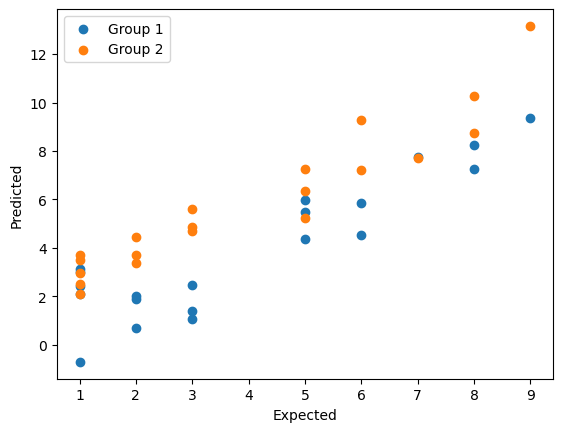

In [42]:
# Generate some data
# generate some uniformly distributed x values
expected = np.random.randint(1, 10, 20)
# add some normally distributed noise to get y values
predicted1 = expected + np.random.normal(0, 1, 20)
predicted2 = expected + np.random.normal(2, 1, 20)

# Create a subplot
fig, ax = plt.subplots()

# Plot each group. You can use `label` to add a legend to each group of points
ax.scatter(x = expected, y = predicted1, label = "Group 1")
ax.scatter(x = expected, y = predicted2, label = "Group 2")

# Customize the plot
ax.set_xlabel("Expected")
ax.set_ylabel("Predicted")

# Add legend
ax.legend()

>**Exercise**: Create a scatter plot of the first two columns of the `wines_array` dataset. Label the x-axis "Fixed Acidity" and the y-axis "Volatile Acidity". Add a title to the plot "Fixed vs Volatile Acidity in Red Wines".

Text(0.5, 1.0, 'Fixed vs Volatile Acidity in Red Wines')

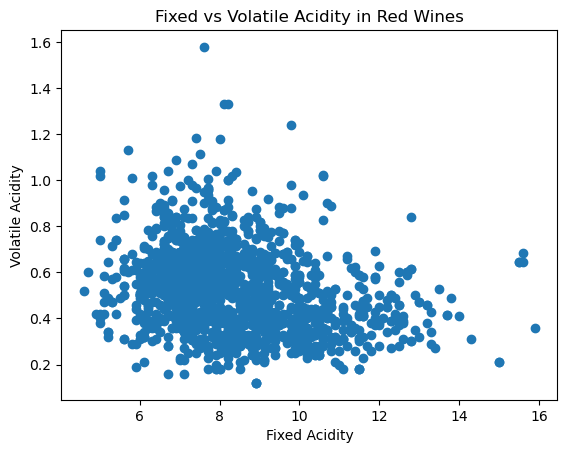

In [43]:
# Your code here

# Create the fig, ax object
fig, ax = plt.subplots()

# Plot the data with ax.scatter
ax.scatter(wines_array[:,0], wines_array[:,1])

# Label the x-axis and y-axis
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_title("Fixed vs Volatile Acidity in Red Wines")

The `ax.scatter()` method takes in the x and y data as the first two arguments. There are additional arguments you can pass to customize the plot, such as changing the color (`c`) or size (`s`) of the points based on a third variable. If you want the legend to reflect the color of points, you can save the return object of the `ax.scatter()` method to a variable and pass that to the `ax.legend()` method.

[<matplotlib.lines.Line2D object at 0x14c7f53a0>, <matplotlib.lines.Line2D object at 0x14dc3bc50>, <matplotlib.lines.Line2D object at 0x14c733e30>, <matplotlib.lines.Line2D object at 0x14dc70050>, <matplotlib.lines.Line2D object at 0x14dc70200>, <matplotlib.lines.Line2D object at 0x14dc703b0>]
['$\\mathdefault{3}$', '$\\mathdefault{4}$', '$\\mathdefault{5}$', '$\\mathdefault{6}$', '$\\mathdefault{7}$', '$\\mathdefault{8}$']


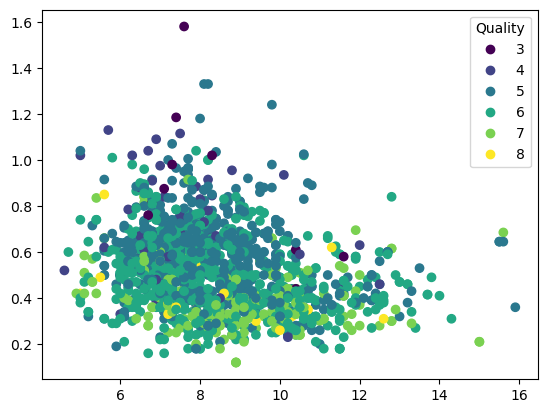

In [44]:
fig, ax = plt.subplots()

# Plot the data with ax.scatter
pts = ax.scatter(x = wines_array[:,0], y = wines_array[:,1], c = wines_array[:,-1])

# the pts object has a method for getting information about the legend
print(pts.legend_elements()[0]) # this element represents the points (each unique dot type)
print(pts.legend_elements()[1]) # this element represents the values (quality)

# Use the * operator to unpack the tuple into the legend method.
ax.legend(*pts.legend_elements(), title="Quality")

### Using loops to plot

It is relatively simple to plot two axes in one figure. Give `plt.subplots` two numbers representing the number of rows and columns you want and the Axes object it returns will beceome an array. You can then index into it to plot on each object. In the below example, we also demonstrate how to plot text using the `.text()` method.

Text(0.5, 0.5, 'Bottom plot')

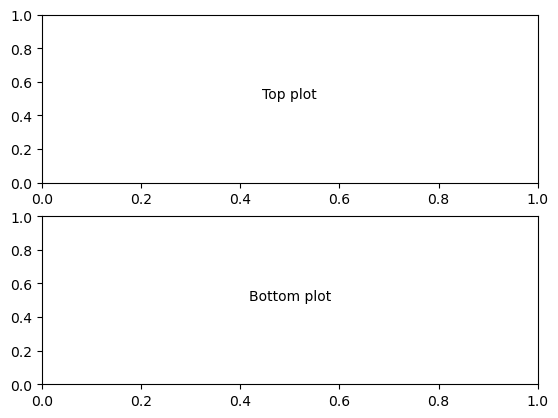

In [45]:
fig, ax = plt.subplots(2,1)
ax[0].text(0.5, 0.5, "Top plot", ha = "center")
ax[1].text(0.5, 0.5, "Bottom plot", ha = "center")


If you want to plot multiple subplots, pass the number of rows and columns of subplots you want to the `plt.subplots()` function. This will return an array of axes objects which you can index into to plot on each subplot. For larger plots, it's helpful to increase the size of the canvas using the `figsize` parameter in `plt.subplots()`.

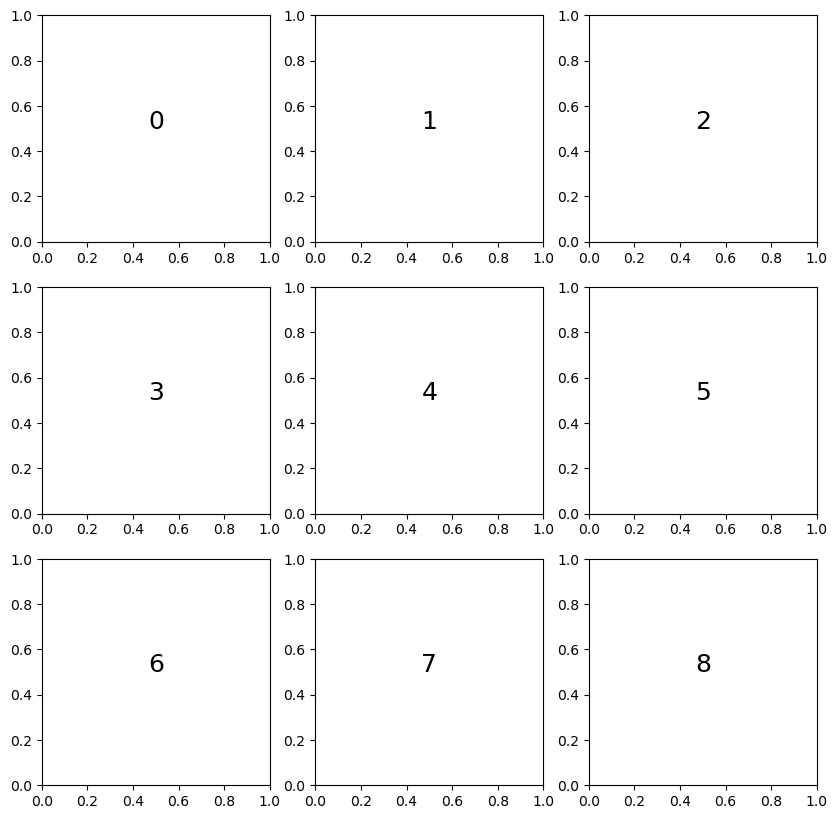

In [46]:
# demonstration of looping through axes to plot multiple subplots
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
# This flattens the 2D array of axes into a 1D array
# Alternatively, you can use a nested loop to plot by row and column
ax = ax.flatten()
for i in range(9):
    # draw number in center of plot
    ax[i].text(0.5, 0.5, str(i), fontsize = 18, ha = 'center')


You can also use loops to loop through an array of data and plot each column. This is useful when you have a lot of data and don't want to write out each plot individually. Let's start with a new type of plot, histogram. The `ax.hist()` method creates a histogram, which is a plot of the frequency of data points in a certain range.

The below is a histogram

Text(0, 0.5, 'Frequency')

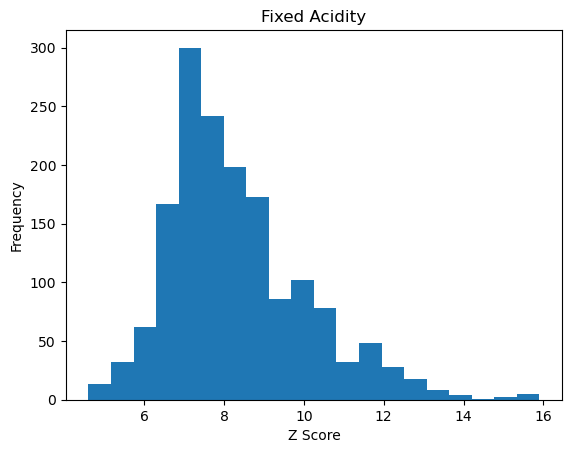

In [47]:
# Create a figure and axis
fig, ax = plt.subplots()

ax.hist(wines_array[:,0], bins = 20, label = wines_header[0])
ax.set_title("Fixed Acidity")
ax.set_xlabel("Z Score")
ax.set_ylabel("Frequency")

Now we will loop through the columns of the `wines_array` dataset and plot a histogram of each column. We will also add a title to each subplot with the name of the column.

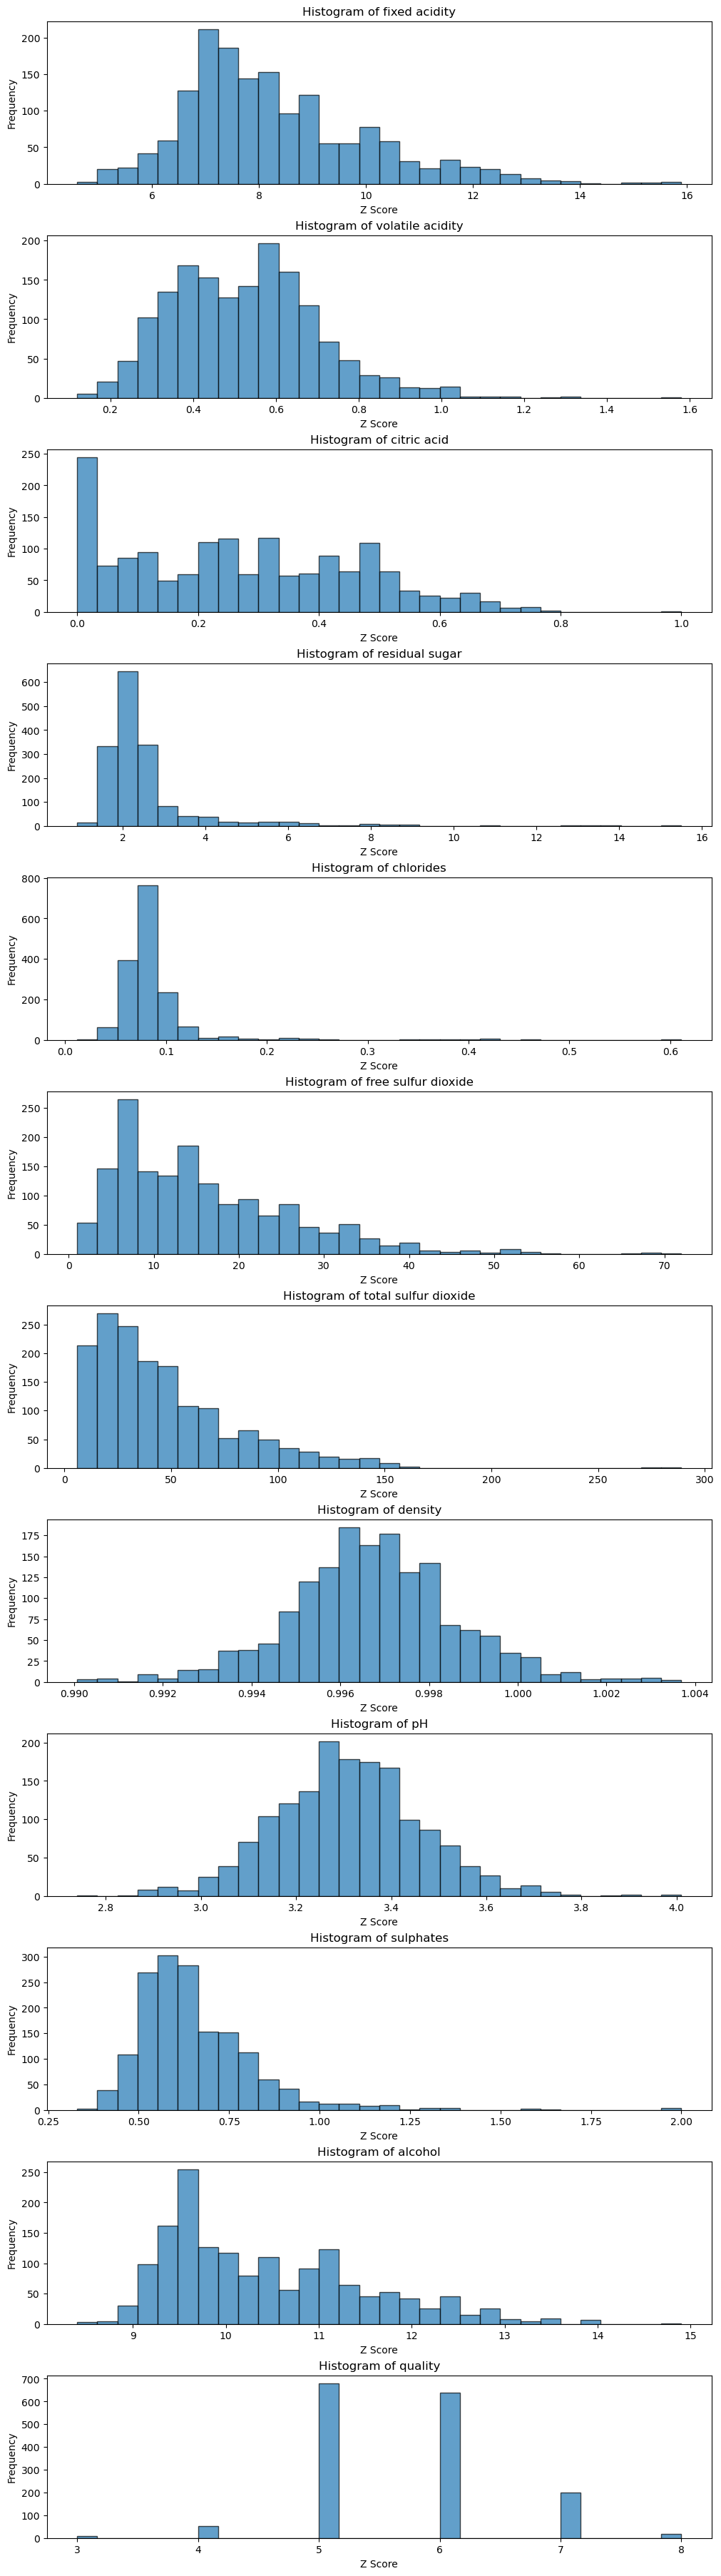

In [48]:
# Create a figure and axis

num_columns = wines_array.shape[1]
fig, axes = plt.subplots(num_columns, 1, figsize=(10, num_columns * 3), constrained_layout=True)

for i in range(num_columns):
    ax = axes[i]  # Select the current subplot
    ax.hist(wines_array[:, i], bins=30, alpha=0.7, edgecolor='black')  # Plot histogram of the current column
    ax.set_title(f'Histogram of {wines_header[i]}')  # Set title
    ax.set_xlabel('Z Score')  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label


>**Exercise:** You will notice that the last column we plotted was the quality scores, and we mistakenly mis-labeled the X axis as "Z Score". Copy the code above and fix the final x-axis label to "Quality Score". *hint* you can fix it outside of the loop or inside the loop using an if statement. 

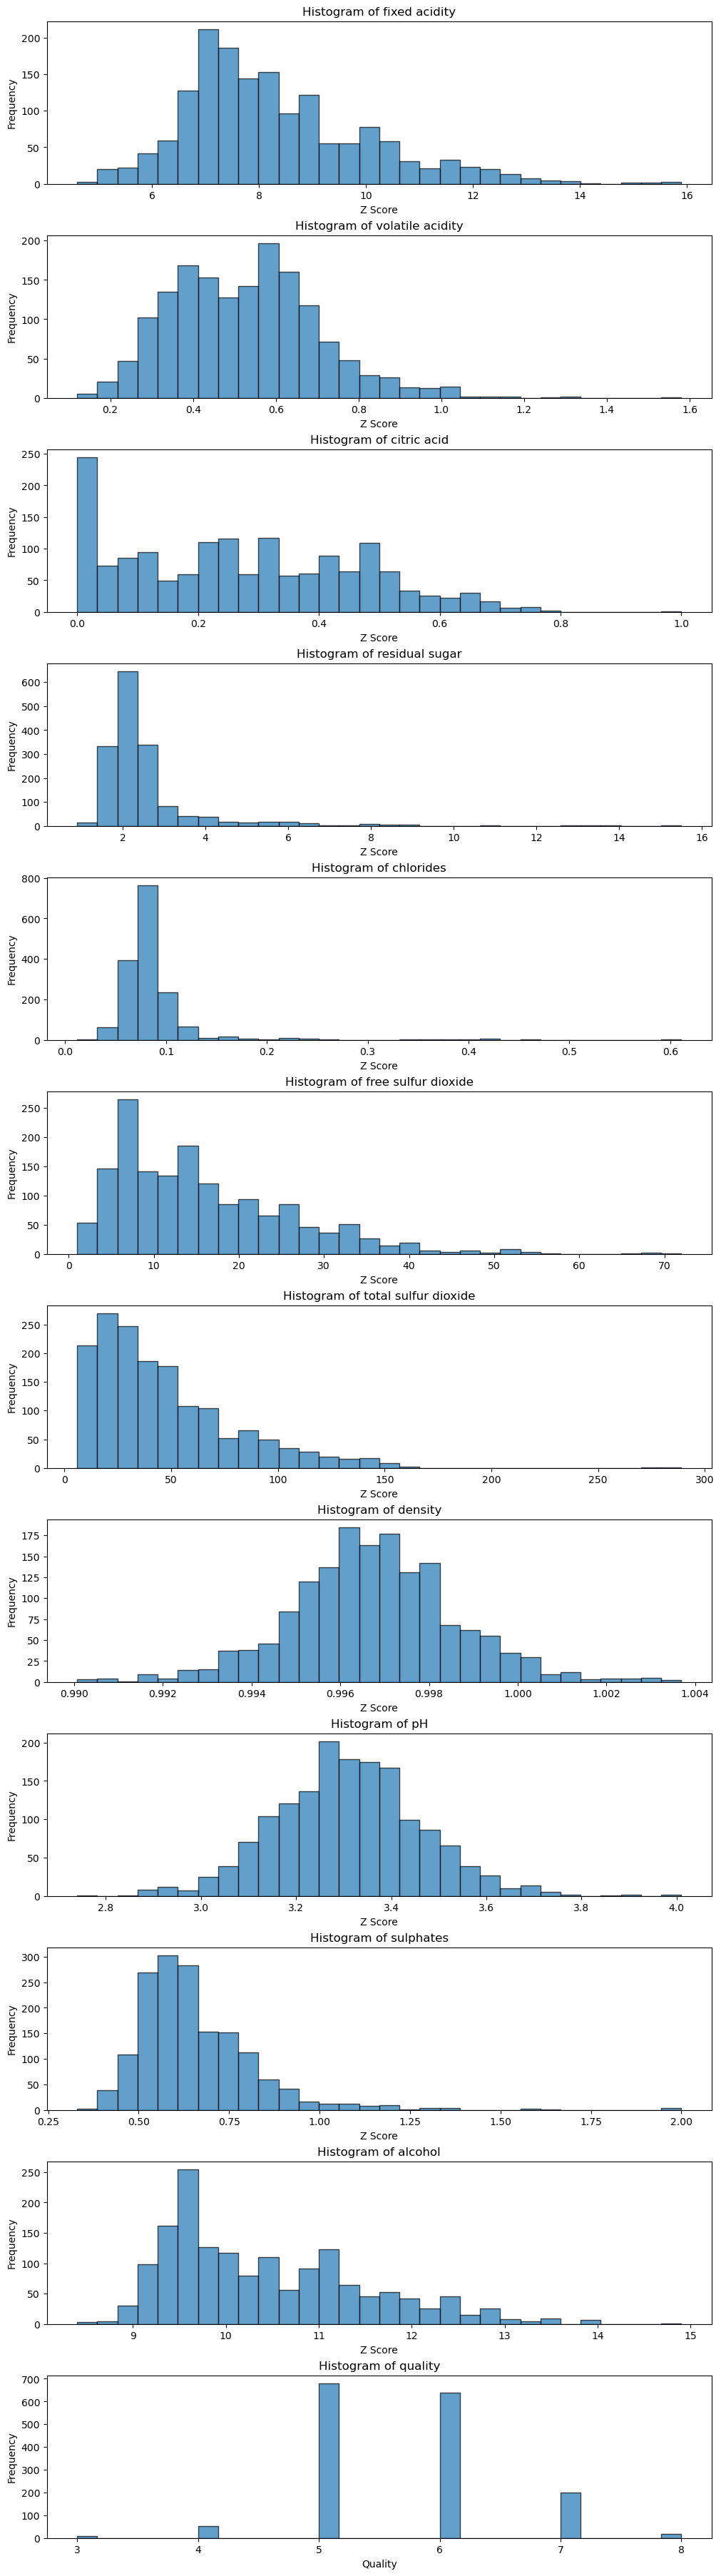

In [49]:
# Your code here

# Create a figure and axis

num_columns = wines_array.shape[1]
fig, axes = plt.subplots(num_columns, 1, figsize=(10, num_columns * 3), constrained_layout=True)

for i in range(num_columns):
    ax = axes[i]  # Select the current subplot
    ax.hist(wines_array[:, i], bins=30, alpha=0.7, edgecolor='black')  # Plot histogram of the current column
    ax.set_title(f'Histogram of {wines_header[i]}')  # Set title
    ax.set_xlabel('Z Score')  # Set x-axis label
    if wines_header[i] == 'quality':
        ax.set_xlabel('Quality')
    ax.set_ylabel('Frequency')  # Set y-axis label

This is just scratching the surface of what you can do with matplotlib. The way most people learn to use matplotlib for their own purposes is to look at the [gallery](https://matplotlib.org/stable/gallery/index.html) and find a plot that is similar to what they want to make. Then they copy the code and modify it to suit their needs.

Alternatively, you can usually find the answer to your questions online. While matplotlib is very powerful, it can be tricky to use and most people have to look up how to do things.

>**Bonuse Exercise**: Think about how you might use a for loop to plot multiple sets of points in the same scatter plot. 

## Pandas

### The pandas DataFrame

Often when we work with data, we have multiple variables with different data types. While numpy arrays are very flexible for numerical data, it does not work as well with a combination of numerical and categorical data or when you want to have labels for your rows and columns. Pandas is another python library that builds upon numpy and adds the ability to create DataFrames, which are 2D tables with labeled rows and columns. You can think of python DataFrames as spreadsheets from Excel or dataframes from R. 

Let's manually create a simple dataframe in pandas to showcase their behavior:

In [50]:
tournamentStats = {
    "wrestler": ["Terunofuji", "Ura", "Shodai", "Takanosho"],
    "wins": [13, 6, 10, 12]
}

dataframe = pd.DataFrame(tournamentStats)

print(dataframe)

     wrestler  wins
0  Terunofuji    13
1         Ura     6
2      Shodai    10
3   Takanosho    12


It is important to note that in pandas dataframes, both rows and columns are *explicitly indexed*, which means that every row and column has a label associated with it, i.e. the index. You can think of the explicit indices as the being the names of the rows and the names of the columns. In other libraries e.g. `numpy` or indeed in base python, arrays and similar data structures are *implicitly* indexed, which means they have an integer associated with their position. For example, if we wanted the first element in a list we would refer to it like `lst[0]`, or we wanted the first element in the first row of a 2D `numpy` array we could specify it with `array[1,1]`. With pandas dataframes, you CAN refer to values implicitly using this default integer index, but you can also refer to its explicit index label. 
For example, we can check the index of the columns in a pandas dataframe using the `columns()` method:

In [51]:
dataframe.columns

Index(['wrestler', 'wins'], dtype='object')

And we can refer to a specific column with its index inside of square brackets `[]`:

In [52]:
#Single column:
dataframe["wrestler"]

#Multiple columns (note the double []!):
dataframe[["wrestler", "wins"]]

,wrestler,wins
0,Terunofuji,13
1,Ura,6
2,Shodai,10
3,Takanosho,12


If we want to explicitly refer to a row, we need to use the `.loc` function:

In [53]:
#First let's check the row indices using the index() function:
print(dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [54]:
#And we can refer to a row using its specific label:
dataframe.loc[0]

wrestler    Terunofuji
wins                13
Name: 0, dtype: object

We also need to use `.loc` if we are referring to a specific row AND column, e.g.:

In [55]:
print(dataframe.loc[0, "wrestler"])

Terunofuji


### Analyzing real data with pandas

To best illustrate the strength of pandas, let's consider a practical use-case. Let's say that we have conducted an RNAseq experiment. We sequenced RNA from five samples, and we want to know how expression levels of each transcript differ between our five samples. We map the RNAseq data against our reference transcriptome and use the `Kallisto` software package to actually calculate the expression level of each transcript in our transcriptome. For each sample, `Kallisto` will output a tab-separated list (a `.tsv` file) that looks something like this: 

```
target_id	length	eff_length	est_counts	tpm
TCONS_00000001	1809	1611.2	0	0
TCONS_00000002	1134	936.204	0	0
TCONS_00000003	1118	920.204	0	0
TCONS_00000004	1121	923.204	0	0
TCONS_00000131	792	594.718	0	0
TCONS_00000005	1429	1231.2	0	0
TCONS_00000006	1554	1356.2	0	0
TCONS_00000007	1662	1464.2	6.00886	0.166434
TCONS_00000132	1997	1799.2	0	0
```

Let's not worry about the details of each column, as for our purposes the two columns were are interested in are the first and last, i.e. the 'target_id' column and the 'tpm' columns. 'Target_id' refers to the unique ID for each transcript in our transcriptome (which are called "TCONS_someNumber"); 'tpm' stands for "transcripts per million" and is just a normalized measurement of transcript abundance (i.e. high TPM == a highly expressed trancript).

Since we have five samples, we will have 5 `.tsv` files output by `Kallisto`. *We want to create a final summary dataset that has a column of transcript IDs and columns for the TPM for each sample, AND the gene that each transcript derives from.* 

This is the sort of problem you will run into quite a lot in bioinformatics...a decently sized portion of the field can basically be summed up as "take this file and re-arrange it to look like another file"! I often find it helpful when starting on tasks like this to *envision what I want my final data to look like*, which can help me figure out where to begin. So in this case, I know I want to produce a final table that looks something like this:

| transID   | sample1_TPM | sample2_TPM | sample3_TPM | sample4_TPM | sample5_TPM | geneID |
|-----------|-------------|-------------|-------------|-------------|-------------|--------|
| TCONS_01  | 0           | 0           | 1.2         | 5           | 3           | gene1  |
| TCONS_02  | 21.4        | 12.3        | 10.0        | 0           | 9.3         | gene1  |
| TCONS_03  | 3.3         | 0.12        | 0           | 0           | 4.7         | gene2  |
| Etc. etc. |             |             |             |             |             |        |

You might be confused about where the gene IDs are coming from, as if we look at our input `.tsv` files we can see that they do not contain any **gene level information**, only the transcript IDs. It's true, we will need an additional source of information! We also have the file `data/geneIDs.tsv`, which contains the corresponding gene names for each transcript and looks like this:

```
TCONS_00000001  gene-SNX18_gGal-2
TCONS_00000002  gene-LOC116806879_tGut-like-2
TCONS_00000004  gene-KCMF1_gGal-like-1
TCONS_00000003  gene-KCMF1_gGal-like-1
TCONS_00000005  gene-ATP5F1AW_gGal-like-2
Etc. etc.
```
So once we have our re-arranged data frame, we will need to query this list and pull out the gene name for each transcript. This can all feel a little overwhelming, so let's step back and consider the large-scale things that our code will need to accomplish...in other words, let's write the logic flow out as pseudo-code together!

```
for each sample input .tsv file
    read in the file as a pandas data frame
    take our columns of interest (transcript ID and TPM)
    save the simplified data frame

merge all five simplified data frames together based on transcript ID

for each transcript in the merged data frame
    get the corresponding gene name from the gene ID list
```

### Importing data to pandas
One of the most useful features of pandas DataFrames is its ability to easily perform complex data transformations. This makes it a powerful tool for cleaning, filtering, and summarizing tabular data. Let's read some data into a DataFrame to demonstrate. 

Below you can see an example of how to read files into pandas using the `pd.read_csv()` function. The `csv` stands for 'comma-separated values', which means by defaults it will assume that our columns are separated by **commas**; however, we can change that to tab-separated easily, using the `sep=` argument. 

In [56]:
df1 = pd.read_csv("https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv", sep='\t')

# The head() function from pandas prints only the first N lines of a dataframe (default: 10)
df1.head()

,target_id,length,eff_length,est_counts,tpm
0,TCONS_00000001,1809,1611.200,0.0,0.0
1,TCONS_00000002,1134,936.204,0.0,0.0
2,TCONS_00000003,1118,920.204,0.0,0.0
3,TCONS_00000004,1121,923.204,0.0,0.0
4,TCONS_00000131,792,594.718,0.0,0.0


Since we need to do the same task several times (i.e. turn multiple input files into pandas dataframes), let's write a function that takes a sample ID and a file path and does the following:
1. use the `read_csv()` function in pandas to read in a file as a pandas dataframe (remember: our input is TAB separated, not comma separated!)
2. re-name the 'target_id' column to 'transcriptID' and the 'tpm' column to the sample ID
3. subsets the data frame to only keep the two renamed columns
4. return the simplified data frame

Recall that you can give a list of columns to a dataframe to subset that dataframe:

In [57]:
list_of_cols = ['target_id', 'tpm']
df1[list_of_cols]

,target_id,tpm
0,TCONS_00000001,0.000000
1,TCONS_00000002,0.000000
2,TCONS_00000003,0.000000
3,TCONS_00000004,0.000000
4,TCONS_00000131,0.000000
...,...,...
94,TCONS_00000065,0.000000
95,TCONS_00000066,0.000000
96,TCONS_00000161,0.000000
97,TCONS_00000162,0.000000


>**Exercise**: write a function that takes a sample ID and a file path and does the following:
>
>1. use the `read_csv()` function in pandas to read in a file as a pandas dataframe (remember: our input is TAB separated, not comma separated!)
>2. re-name the 'target_id' column to 'transcriptID' and the 'tpm' column to the `sampleID` (use the `.rename()` method of your dataframe)
>3. subsets the data frame to only keep the two renamed columns
>4. return the simplified data frame

In [58]:
def makePandasDF(sampleID,samplePath):
    #Your code goes here: 
    df = pd.read_csv(samplePath, sep='\t') #read the tab-separated file as a Pandas dataframe

    df = df.rename(columns={'target_id': 'transcriptID', 'tpm': sampleID}) #renaming two columns for clarity/ease of use later

    keepColumns = ['transcriptID', sampleID] #making a list of the columns we want to retain
    dfSimple = df[keepColumns] #subset the dataframe to only be the two desired columns

    return dfSimple #return the simplified data frame

In [59]:
# Test your code:
sampleID = "AC_1873_20908"
filePath = "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv"

makePandasDF(sampleID, filePath)

,transcriptID,AC_1873_20908
0,TCONS_00000001,0.000000
1,TCONS_00000002,0.000000
2,TCONS_00000003,0.000000
3,TCONS_00000004,0.000000
4,TCONS_00000131,0.000000
...,...,...
94,TCONS_00000065,0.000000
95,TCONS_00000066,0.000000
96,TCONS_00000161,0.000000
97,TCONS_00000162,0.000000


Now let's expand our code further. We have five samples that we want to read in and convert to Pandas dataframes. We are going to create a dictionary where the `key` is the unique sample ID for each sample, and the `value` is the tab-separated list (i.e. the data) for each sample:

In [1]:
#We have 5 samples and corresponding datasets
#We will save them as a dictionary where the key = sample ID and value = path to the dataset
samplesDict = {
    "AC_1873_20908": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv",
    "AW_366493": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/B03v1_366493_h_S18_L003_abundance.tsv",
    "AW_366490": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E06v1_366490_g_S45_L003_abundance.tsv",
    "AW_366494": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv",
    "AW_365335": "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E08v1_365335_e_S61_L003_abundance.tsv"
}

print(samplesDict)
print(samplesDict["AW_366494"])
example = samplesDict["AW_366494"]
print(example)

{'AC_1873_20908': 'https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/A01v1_20908_bl_S1_L003_abundance.tsv', 'AW_366493': 'https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/B03v1_366493_h_S18_L003_abundance.tsv', 'AW_366490': 'https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E06v1_366490_g_S45_L003_abundance.tsv', 'AW_366494': 'https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv', 'AW_365335': 'https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E08v1_365335_e_S61_L003_abundance.tsv'}
https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv
https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/E07v1_366494_br_S53_L003_abundance.tsv


> Excercise: write a loop that takes each sample and converts it to a pandas dataframe, using the function we created above. Hold all the pandas dataframes in a list. Remember: python dictionary keys are iterable, just like a list is. The result of your loop should be a list holding all the pandas dataframes.

In [61]:
pandasDFs = [] #initialize a list to hold the pandas dataframes

# Your code goes here:
for sample in samplesDict:
    filePath = samplesDict[sample]

    pandasDFs.append(makePandasDF(sample,filePath))

To create our finalized dataset, we will need to merge all the pandas dataframes together. Let's take a look at our dataframes to remind ourselves what they look like: 

In [62]:
# here we tell head() to only print the first 5 lines, rather than the default 10
pandasDFs[0].head(5)
pandasDFs[1].head(5)

,transcriptID,AW_366493
0,TCONS_00000001,1.82628
1,TCONS_00000002,30.01240
2,TCONS_00000003,0.00000
3,TCONS_00000004,2.63508
4,TCONS_00000131,6.84775


When merging, we don't just want to concatenate all the data frames together; instead, we want to join the dataframes based on the values in the 'transcriptID' column. For this we will use the `pd.merge()` function in pandas, which combines two dataframes based on a shared column (or index). 
Let's look at a simple example first to see how exactly the `merge()` function works. Here we manually define two simple pandas dataframe using the `pd.DataFrame()` function, where `df1` has two columns (called 'A' and 'B') and `df2` has two columns (called 'A' and 'C') with one more row than `df1`.

In [63]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']})
df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3', 'A4'],'C': ['C0','C1', 'C2', 'C3', 'C4']})

df1.head()


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [64]:
df2.head()

,A,C
0,A0,C0
1,A1,C1
2,A2,C2
3,A3,C3
4,A4,C4


When we merge the two dataframes using the `pd.merge()` function, we can specify that the column to merge on is "A" and whether to keep only rows in common (default) or to keep all rows (`how='outer'`). Note that when we do the outer merge, the missing values are filled in with `NaN`.

In [65]:
print(pd.merge(df1, df2, on = 'A'))
print(pd.merge(df1, df2, on = 'A', how = 'outer'))

    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
3  A3  B3  C3
    A    B   C
0  A0   B0  C0
1  A1   B1  C1
2  A2   B2  C2
3  A3   B3  C3
4  A4  NaN  C4


The `how = 'outer'` argument refers to the **type of join** we want to perform...the types of joins can get a little complicated and is beyond the scope of this class, but if you are familiar with `SQL` or the `tidyverse` package in `R`, it is basically identical to the joins in those languages. You can also check out the pandas merge documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge).

>Exercise: write a loop that merges our five pandas dataframes that we created above into a new dataframe. 

In [66]:
mergedDF = pandasDFs[0] #we first need to an initial dataframe which we can then sequentially merge on

#your code goes here:
for df in pandasDFs[1:]:
    mergedDF = pd.merge(mergedDF, df, on='transcriptID')


mergedDF.head()

,transcriptID,AC_1873_20908,AW_366493,AW_366490,AW_366494,AW_365335
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385


Now for the final step, getting the gene name for each transcript! Recall that this information lives in the file `data/geneIDs.tsv`, so we are first going to have to read in this file as well. There are several ways we could do this, depending on what our specific goals are, but as we only want to retain the transcripts that have a corresponding gene ID in the table, the easiest way is again using the `merge()` function.

Here's a sample of what the file looks like:

```
TCONS_00000001	gene-SNX18_gGal-2
TCONS_00000002	gene-LOC116806879_tGut-like-2
TCONS_00000004	gene-KCMF1_gGal-like-1
TCONS_00000003	gene-KCMF1_gGal-like-1
```

>Exercise: read in the file `data/geneIDs.tsv` as a pandas dataframe and merge it with our combined dataframe to assign a gene name to each transcript 
>
> Note that this import requires customizing the `pd.read_csv()` function because there is no header. You'll have to look at the documentation to figure out how to add a header

In [67]:
# your code goes here:
filename = "https://informatics.fas.harvard.edu/resources/Workshops/2024-Fall/Python/data/geneIDs.tsv"

gene_df = pd.read_csv(filename, sep='\t', header=None, names=['transcriptID', 'geneID'])
mergedDF = pd.merge(mergedDF, gene_df, on='transcriptID')
mergedDF.head()

,transcriptID,AC_1873_20908,AW_366493,AW_366490,AW_366494,AW_365335,geneID
0,TCONS_00000001,0.0,1.82628,0.000000,4.534810,2.620970,gene-SNX18_gGal-2
1,TCONS_00000002,0.0,30.01240,0.146875,47.794500,53.964900,gene-LOC116806879_tGut-like-2
2,TCONS_00000003,0.0,0.00000,0.000000,0.000000,0.000000,gene-KCMF1_gGal-like-1
3,TCONS_00000004,0.0,2.63508,0.000000,1.196400,1.136450,gene-KCMF1_gGal-like-1
4,TCONS_00000131,0.0,6.84775,0.000000,0.124533,0.525385,gene-NTRK2_tGut-1
